<a href="https://colab.research.google.com/github/Yamashitast/DeepLearning2022Late/blob/main/FashionMNIST2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ファッション画像(MNISTデータ)の画像認識

##データの読み込み
ライブラリから読み込み

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
#KerasとTensorFlowを読み込む
import tensorflow as tf
from tensorflow import keras

###ファッションMNIST

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
#データ読み込み
(train_images, train_labels),(test_images,test_labels)=fashion_mnist.load_data()


###分類用の変数を定義する
・0 T-shirt/top<br>
・1 Trouser<br>
・2 Pullover<br>
・3 Dress<br>
・4 Coat<br>
・5 Sandal<br>
・6 Shirt<br>
・7 Sneaker<br>
・8 Bag<br>
・9Ankle boot<br>

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Drerss','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[3])#リストの中身を確認

Drerss


###読み込んだデータの確認

In [ ]:
#train_images,teset_imagesの形を確認
print(train_images.shape)#学習用画像データの形
print(test_images.shape)#テスト検証用画像データの形
print(train_labels.shape)#学習用答えデータ(ラベル)の形
print(train_labels)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
[9 0 0 ... 3 0 5]


###画像データを表示

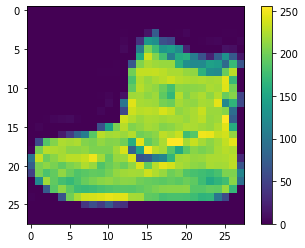

In [ ]:
#学習画像の先頭を確認
#matplotlibのpyplotを読み込む
import matplotlib.pyplot as plt
#numpyを読み込む
import numpy as np

plt.figure()
plt.imshow(train_images[0])#9番のアンクルブーツ
plt.colorbar()
plt.grid(False)
plt.show()

###データを256段階に整形

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

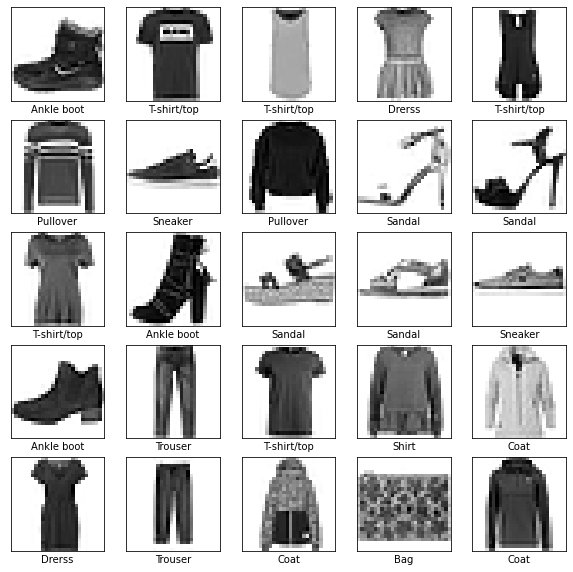

In [ ]:
#整形後のデータを表示
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
#ループ終わり

##学習モデルを組み立てる

###層(レイヤー)を設定追加していく

In [ ]:
#kerasの学習モデルに層を設定
model=tf.keras.Sequential()#学習モデル
#入力データを整形(28*28が1画像の1次元データに整形)
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#パーセプトロンの層追加(Dense)#出力を128,活性化関数をrelu関数で指定
model.add(tf.keras.layers.Dense(128,activation='relu'))
#2つ目の層の追加(Dense)#出力を10,最後の層
model.add(tf.keras.layers.Dense(10))

学習モデルをコンパイル

In [ ]:
#学習モデルをコンパイル
#オプティマイザー=adam(損失をみて学習パラメータを更新する方法)
#損失関数=クロスエントロピー(正解率の計算方法)
#指標 accuracy(正解率)学習状況の監視の基準
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###出来上がった学習モデルでサンプルデータを学習する

In [ ]:
#学習する
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5008 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3761 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3364 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3144 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2959 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2801 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2681 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2468 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

#学習したモデルを評価検証する

In [ ]:
#学習していないデータ(test_images&test_labels)で学習度合いを評価検証する
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
#評価結果の戻り値のうち、精度を表示する
print('精度 accuracy:',test_acc)

313/313 - 1s - loss: 0.3718 - accuracy: 0.8705 - 612ms/epoch - 2ms/step
精度 accuracy: 0.8705000281333923


###学習モデルで予測させる

In [ ]:
#学習モデルで予測させる
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
#予測モデルの予測結果を受け取る
predictions=probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


###予測結果を確認

In [ ]:
#予測結果の形を確認
print(predictions.shape)
#先頭行を確認
print(predictions[0])
#一番高い確率を確認
print(np.argmax(predictions[0]))
print(predictions[0][9])
#testの先頭データは何か確認(予測が正解したか?)
print(test_labels[0])
print(class_names[test_labels[0]])

(10000, 10)
[2.46118975e-06 9.60216018e-10 2.07513793e-08 2.75029608e-12
 1.84124527e-09 1.30324205e-02 1.04280815e-08 1.48417905e-01
 3.45764306e-07 8.38546872e-01]
9
0.8385469
9
Ankle boot


##個別の予測結果をグラフィカルに表示するための関数を準備する

###画像と結果の値を表示する関数

In [ ]:
def plot_image(i,predictions_array,true_label,img):
  #正解ラベルリストのi番目と画像リストのi番目を抜き出す
  true_label,img=true_label[i],img[i]
  #pyplotの設定
  plt.grid(False)#グリッドなし
  plt.xticks([])#x刻みなし
  plt.yticks([])#y刻みなし
  plt.imshow(img,cmap=plt.cm.binary)#画像を白黒表示で設定
  #予測結果の文字列表示部分
  #予測の配列のうち、一番高い確率といわれているものを抜き出して代入
  predicted_label=np.argmax(predictions_array)
  #予測が正解ラベルと同じ値かどうかを判定
  if predicted_label==true_label:
    color='blue'#予測が正解の時は青色で表示
  else:
    color='red'#予測が不正解の時は赤色で表示
  #if文終わり
#plotに横タイトルを設定
#予測商品名、予測確率、正解商品名の順に表示
  plt.xlabel("{}{:2.0f}%({})".format(
      class_names[predicted_label],
      100*np.max(predictions_array),
      class_names[true_label]),color=color)
#関数終わり

###予測と正解の値を棒グラフで表示する関数

In [ ]:
def plt_value_array(i,predictions_array,true_label):
  true_label=true_label[i]
  #pyplotの設定
  plt.grid(False)#グリッドなし
  plt.xticks(range(10))#x刻み0～9
  plt.yticks([])#y刻みなし
  #棒を設定 棒を10刻みでpredictions_arrayの数分、グレー表示
  thisplot=plt.bar(range(10),predictions_array,color='#777777')
  plt.ylim([0,1])
  #正解、不正解の棒をグレーから色を変える
  predicted_label=np.argmax(predictions_array)
  #予測の棒は赤に変える
  thisplot[predicted_label].set_color('red')
  #正解の棒は青に変える(赤い予測も青に変わる)
  thisplot[true_label].set_color('blue')
#関数終わり

###作成した関数を使って予測と正解をグラフィカル表示する

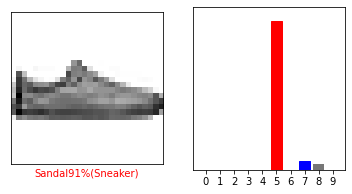

In [ ]:
#0番目の画像を確認
i=12
#plotを設定
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#画像とタイトルを関数表示
#i=0,predictions[0]=1万件分の予測の0番目=10個の確率の配列
#test_labels=1万件の正解配列、test_images=1万件分の評価用画像データ
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)#隣にサブプロット
#予測結果を関数で棒グラフ表示
plt_value_array(i,predictions[i],test_labels)
plt.show()#最後に表示